In [ ]:
!wget https://blackhole.bluelabel.workers.dev/0:/Colab%20Notebooks/EMG-data.csv.zip

--2024-01-25 05:19:01--  https://blackhole.bluelabel.workers.dev/0:/Colab%20Notebooks/EMG-data.csv.zip
Resolving blackhole.bluelabel.workers.dev (blackhole.bluelabel.workers.dev)... 104.21.74.46, 172.67.198.102, 2606:4700:3033::6815:4a2e, ...
Connecting to blackhole.bluelabel.workers.dev (blackhole.bluelabel.workers.dev)|104.21.74.46|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17170256 (16M) [application/zip]
Saving to: ‘EMG-data.csv.zip’

EMG-data.csv.zip    100%[===================>]  16.37M  21.0MB/s    in 0.8s    

2024-01-25 05:19:07 (21.0 MB/s) - ‘EMG-data.csv.zip’ saved [17170256/17170256]



In [ ]:
!unzip '/content/EMG-data.csv.zip'

Archive:  /content/EMG-data.csv.zip
  inflating: EMG-data.csv            


In [ ]:
import pandas as pd
import random
import csv
import numpy as np

In [ ]:
dataset_directory = '/content/EMG-data.csv'
df = pd.read_csv(dataset_directory)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4237907 entries, 0 to 4237906
Data columns (total 11 columns):
 #   Column    Dtype  
---  ------    -----  
 0   time      int64  
 1   channel1  float64
 2   channel2  float64
 3   channel3  float64
 4   channel4  float64
 5   channel5  float64
 6   channel6  float64
 7   channel7  float64
 8   channel8  float64
 9   class     int64  
 10  label     int64  
dtypes: float64(8), int64(3)
memory usage: 355.7 MB


In [ ]:
df.drop('time', inplace=True, axis=1)

df.head()

,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8,class,label
0,0.00001,-0.00002,-0.00001,-0.00003,0.00000,-0.00001,0.00000,-0.00001,0,1
1,0.00001,-0.00002,-0.00001,-0.00003,0.00000,-0.00001,0.00000,-0.00001,0,1
2,-0.00001,0.00001,0.00002,0.00000,0.00001,-0.00002,-0.00001,0.00001,0,1
3,-0.00001,0.00001,0.00002,0.00000,0.00001,-0.00002,-0.00001,0.00001,0,1
4,-0.00001,0.00001,0.00002,0.00000,0.00001,-0.00002,-0.00001,0.00001,0,1


In [ ]:
df.info()
len(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4237907 entries, 0 to 4237906
Data columns (total 10 columns):
 #   Column    Dtype  
---  ------    -----  
 0   channel1  float64
 1   channel2  float64
 2   channel3  float64
 3   channel4  float64
 4   channel5  float64
 5   channel6  float64
 6   channel7  float64
 7   channel8  float64
 8   class     int64  
 9   label     int64  
dtypes: float64(8), int64(2)
memory usage: 323.3 MB


4237907

In [ ]:
df.isna().sum()

channel1    0
channel2    0
channel3    0
channel4    0
channel5    0
channel6    0
channel7    0
channel8    0
class       0
label       0
dtype: int64

In [ ]:
print(df['class'].value_counts())

0    2725157
6     253009
5     251733
4     251570
1     250055
3     249494
2     243193
7      13696
Name: class, dtype: int64


In [ ]:
df.drop(df[df['class'] == 0].index, inplace=True)

In [ ]:
df.head()

,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8,class,label
2287,-0.00001,0.00000,-0.00001,0.00000,0.00000,-0.00001,-0.00001,0.00001,1,1
2288,-0.00001,-0.00002,0.00000,-0.00001,-0.00001,-0.00001,-0.00003,-0.00002,1,1
2289,-0.00001,-0.00002,0.00000,-0.00001,-0.00001,-0.00001,-0.00003,-0.00002,1,1
2290,-0.00001,-0.00002,0.00000,-0.00001,-0.00001,-0.00001,-0.00003,-0.00002,1,1
2291,-0.00001,-0.00002,0.00000,-0.00001,-0.00001,-0.00001,-0.00003,-0.00002,1,1


In [ ]:
all_labels_present = df.groupby('class')['label'].nunique() == 36
# use .unquniq() == 36 to check if all class have 36 unique label
all_labels_present

class
1     True
2     True
3     True
4     True
5     True
6     True
7    False
Name: label, dtype: bool

In [ ]:
# check how many label in class = 7
class_7_data = df[df['class'] == 7]
class_7_label_counts = class_7_data.groupby('label').size().reset_index(name='count')
class_7_label_counts

,label,count
0,11,7105
1,30,6591


In [ ]:
data = df[df['class'] != 7]

In [ ]:
data['class'].value_counts()

6    253009
5    251733
4    251570
1    250055
3    249494
2    243193
Name: class, dtype: int64

In [ ]:
subjects_data = data.groupby(['label','class'])

In [ ]:
import pandas as pd

# Assuming you have loaded your dataset into a DataFrame named df
class_counts = data.groupby('class').size().reset_index(name='count')

print('Class distribution:')
print(class_counts)

Class distribution:
   class   count
0      1  250055
1      2  243193
2      3  249494
3      4  251570
4      5  251733
5      6  253009


In [ ]:
data

,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8,class,label
2287,-0.00001,0.00000,-0.00001,0.00000,0.00000,-0.00001,-0.00001,0.00001,1,1
2288,-0.00001,-0.00002,0.00000,-0.00001,-0.00001,-0.00001,-0.00003,-0.00002,1,1
2289,-0.00001,-0.00002,0.00000,-0.00001,-0.00001,-0.00001,-0.00003,-0.00002,1,1
2290,-0.00001,-0.00002,0.00000,-0.00001,-0.00001,-0.00001,-0.00003,-0.00002,1,1
2291,-0.00001,-0.00002,0.00000,-0.00001,-0.00001,-0.00001,-0.00003,-0.00002,1,1
...,...,...,...,...,...,...,...,...,...,...
4237207,0.00009,0.00001,0.00003,0.00001,-0.00003,-0.00008,0.00004,0.00000,6,36
4237208,0.00009,0.00001,0.00003,0.00001,-0.00003,-0.00008,0.00004,0.00000,6,36
4237209,0.00009,0.00001,0.00003,0.00001,-0.00003,-0.00008,0.00004,0.00000,6,36
4237210,0.00014,0.00003,-0.00001,0.00001,-0.00012,0.00006,-0.00007,-0.00013,6,36


In [ ]:
data.drop('label', inplace=True, axis=1)

<ipython-input-19-8dc61b7a99ba>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop('label', inplace=True, axis=1)


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1499054 entries, 2287 to 4237211
Data columns (total 9 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   channel1  1499054 non-null  float64
 1   channel2  1499054 non-null  float64
 2   channel3  1499054 non-null  float64
 3   channel4  1499054 non-null  float64
 4   channel5  1499054 non-null  float64
 5   channel6  1499054 non-null  float64
 6   channel7  1499054 non-null  float64
 7   channel8  1499054 non-null  float64
 8   class     1499054 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 114.4 MB


In [ ]:
def normalized(data):
    min_value = np.min(data)
    max_value = np.max(data)
    normalized_data = (data - min_value) / (max_value - min_value)
    return normalized_data

In [ ]:
def sliding_window(data, window_size, stride):
    windowed_data = []
    labels = []

    for i in range(0, len(data) - window_size + 1, stride):
        windowed = data.iloc[i:i+window_size, :-1].values  # Etiket sütununu hariç al ve NumPy array'e dönüştür
        label = data.iloc[i+window_size-1, -1]  # Son sütunu etiket olarak kullan
        windowed_data.append(windowed)
        labels.append(label)

    return np.array(windowed_data), np.array(labels)

In [ ]:
window_size=150
stride=30
X, Y = sliding_window(data, 150, 30)

In [ ]:
X = normalized(X)

In [ ]:
Y = Y - 1

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(39971, 150, 8)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, LSTM, Dropout
import keras

In [ ]:

def CNN_model(input_shape, num_classes):
    model = Sequential()

    # Convolutional layers
    model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=input_shape))
    model.add(MaxPooling1D(pool_size=2))

    model.add(Conv1D(64, kernel_size=3, activation='relu'))

    model.add(Conv1D(90, kernel_size=3, activation='relu'))


    # Flattening layers
    model.add(Flatten())

    # Full connected layers
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))


    # compile the model
    opt = keras.optimizers.Adam(learning_rate=0.001)
    model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    model.summary()

    return model

In [ ]:
# define the CNN model
input_shape = X_train.shape[1:]  # set input size
num_classes = len(np.unique(Y))   # set class size

model = CNN_model(input_shape, num_classes)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 148, 32)           800       
                                                                 
 max_pooling1d (MaxPooling1  (None, 74, 32)            0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 72, 64)            6208      
                                                                 
 conv1d_2 (Conv1D)           (None, 70, 90)            17370     
                                                                 
 flatten (Flatten)           (None, 6300)              0         
                                                                 
 dense (Dense)               (None, 128)               806528    
                                                        

In [ ]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
1250/1250 [==============================] - 21s 16ms/step - loss: 1.2693 - accuracy: 0.4853 - val_loss: 1.0782 - val_accuracy: 0.5688
Epoch 2/20
1250/1250 [==============================] - 21s 16ms/step - loss: 0.8772 - accuracy: 0.6637 - val_loss: 0.8846 - val_accuracy: 0.6443
Epoch 3/20
1250/1250 [==============================] - 20s 16ms/step - loss: 0.7685 - accuracy: 0.7138 - val_loss: 0.7176 - val_accuracy: 0.7367
Epoch 4/20
1250/1250 [==============================] - 19s 15ms/step - loss: 0.6976 - accuracy: 0.7433 - val_loss: 0.6691 - val_accuracy: 0.7505
Epoch 5/20
1250/1250 [==============================] - 19s 15ms/step - loss: 0.6482 - accuracy: 0.7618 - val_loss: 0.6441 - val_accuracy: 0.7600
Epoch 6/20
1250/1250 [==============================] - 20s 16ms/step - loss: 0.6133 - accuracy: 0.7762 - val_loss: 0.6259 - val_accuracy: 0.7608
Epoch 7/20
1250/1250 [==============================] - 19s 15ms/step - loss: 0.5819 - accuracy: 0.7871 - val_loss: 0.6466 -

In [ ]:
from sklearn.metrics import accuracy_score

y_pred_train = model.predict(X_train)
y_pred_train = np.argmax(y_pred_train, axis=1)  # One-hot encoding'den etiketlere dönüştür

# make predictions on test data
y_pred_test = model.predict(X_test)
y_pred_test = np.argmax(y_pred_test, axis=1)  # One-hot encoding'den etiketlere dönüştür

# calculate accuracy
accuracy_training = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)


313/313 [==============================] - 2s 5ms/step


In [ ]:
print("Training Accuracy:", accuracy_training)
print("Test Accuracy:", accuracy_test)

Training Accuracy: 0.8532185834730179
Test Accuracy: 0.8210747523266286


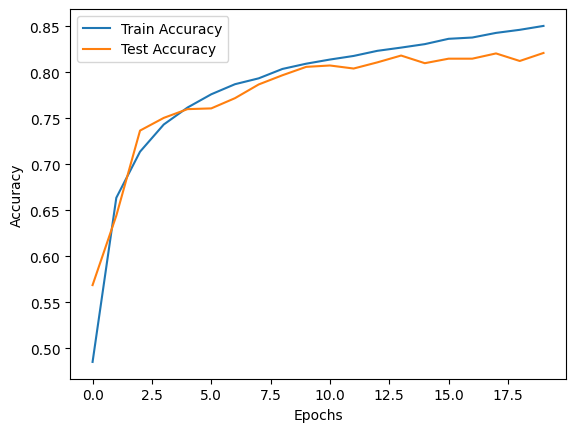

In [ ]:

import matplotlib.pyplot as plt
# Get the accuracy values from the history object
train_accuracy = history.history['accuracy']
test_accuracy = history.history['val_accuracy']
plt.plot(train_accuracy, label='Train Accuracy')
plt.plot(test_accuracy, label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()